In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import scipy as sp
import scipy.fftpack
import csv
import os
import statistics

In [20]:
# list to store file lines
lines = []
# read file
with open(r"TA780_20230426_Final2.csv", 'r') as fp:
    # read an store all lines into list
    lines = fp.readlines()

# Write file
with open(r"test.tcsv", 'w') as fp:
    # iterate each line
    for number, line in enumerate(lines):
        # delete line 5 and 8. or pass any Nth line you want to remove
        # note list index starts from 0
        if number not in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
            fp.write(line)

## Modified file to write columns except the first column

In [21]:
df = pd.read_csv('test.tcsv')
# If you know the name of the column skip this
C1 = df.columns[0]
# Delete first
df = df.drop([C1], axis=1)
df.to_csv('test2.tcsv', index=False)

## THe old Code

In [22]:
def rms(x):
    return np.sqrt(np.vdot(x, x)/x.size)
def mean(x):
    return np.sum(x)/x.size
def std_dev(x):
    return np.std(x)

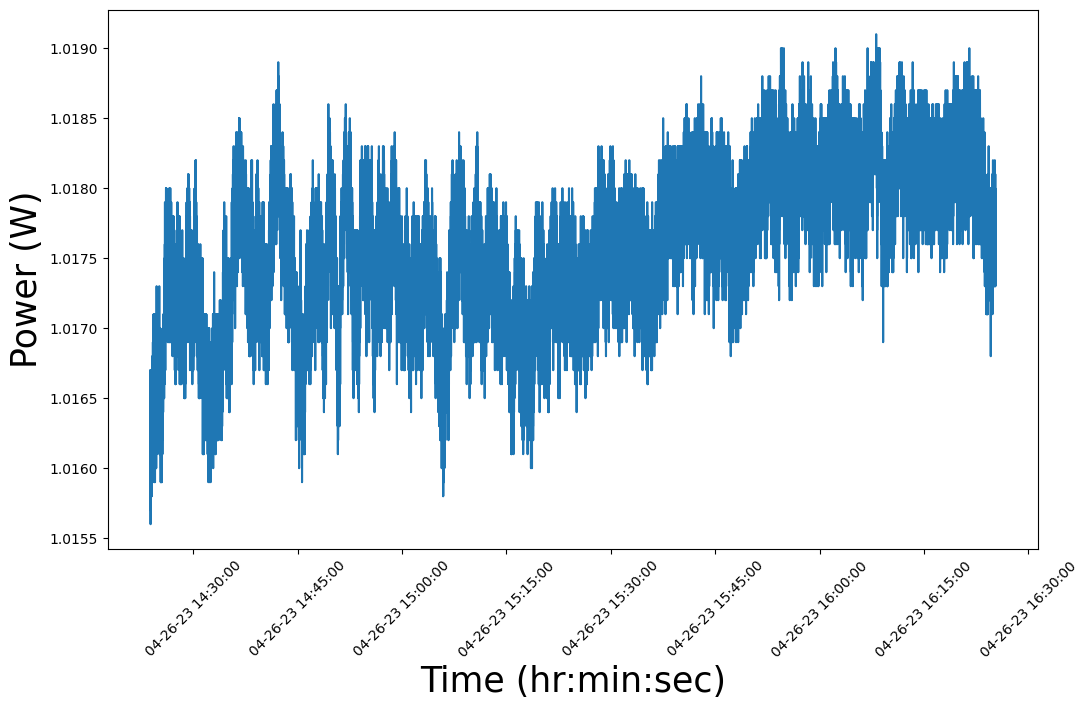

In [23]:
dataset = pd.read_csv('test2.tcsv', sep=",",header = None)
accData=dataset.values.tolist()
#accData=np.asarray([np.asarray(elem) for elem in accData])
dataset['A'] = dataset[0] 
dataset['B'] = dataset[1] 
dataset['C'] = dataset[2] 
dataset['D'] = pd.to_datetime(dataset['A'] + ' ' + dataset['B'])
#dataset['D'] = dataset[3] 


C0 = np.array(dataset['C'])
C2 = np.array(dataset['D'])
C3 = C0#.astype(float)

#r = rms(C2)
#m = mean(C2)
#s = std_dev(C2)

import matplotlib.dates as mdates
figure,ax=plt.subplots(1)
plt.rcParams['figure.figsize'] =  [12,7]
plt.xticks(rotation=45)
ax.plot(C2, C3)
ax.set_xlabel(r'Time (hr:min:sec)',fontsize=25)
ax.set_ylabel(r'Power (W)',fontsize=25)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y %H:%M:%S'))
#ax.set_xticks(np.arange(0, len(C1)+1, len(C1)/10));
#ax.set_ylim([1.5,1.8]);
#plt.text(0.9,0.9,'rms: '+str(round(r,2))+' \nmean: '+str(round(m,2))+' \nstd: '+str(round(s,2)),horizontalalignment='left',
 #    verticalalignment='top', transform = ax.transAxes)

#y = statistics.mean(C2)
# Printing the mean
#print("Mean is :", y, "W")

In [24]:
print(C2[0:10])
print(C2[0:10])


['2023-04-26T14:23:46.360000000' '2023-04-26T14:23:46.485000000'
 '2023-04-26T14:23:46.615000000' '2023-04-26T14:23:46.738000000'
 '2023-04-26T14:23:46.861000000' '2023-04-26T14:23:46.987000000'
 '2023-04-26T14:23:47.018000000' '2023-04-26T14:23:47.142000000'
 '2023-04-26T14:23:47.265000000' '2023-04-26T14:23:47.388000000']
['2023-04-26T14:23:46.360000000' '2023-04-26T14:23:46.485000000'
 '2023-04-26T14:23:46.615000000' '2023-04-26T14:23:46.738000000'
 '2023-04-26T14:23:46.861000000' '2023-04-26T14:23:46.987000000'
 '2023-04-26T14:23:47.018000000' '2023-04-26T14:23:47.142000000'
 '2023-04-26T14:23:47.265000000' '2023-04-26T14:23:47.388000000']


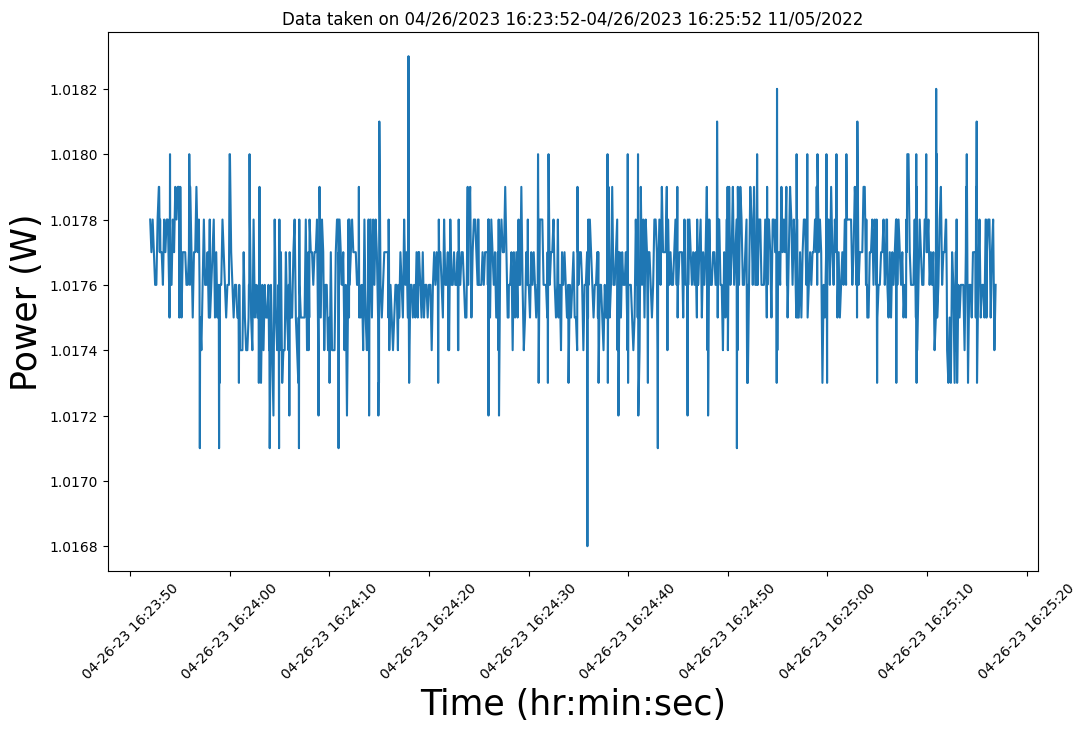

In [25]:
start_date = "04/26/2023 16:23:52" #Provide your start dateTime as input here in the same exact format
end_date = "04/26/2023 16:25:52" #Provide your end dateTime as input here in the same exact format
  
mask = (dataset['D'] >= start_date) & (dataset['D'] <= end_date)

selected_dataset = dataset.loc[mask]


C0_selected = np.array(selected_dataset['C'])
C2_selected = np.array(selected_dataset['D'])
C3_selected = C0_selected

#r = rms(C2_selected)
#m = mean(C2_selected)
#s = std_dev(C2_selected)

figure,ax=plt.subplots(1)
plt.rcParams['figure.figsize'] =  [12,7]
plt.xticks(rotation=45)

ax.plot(C2_selected,C3_selected)
ax.tick_params(labelsize=10)
ax.set_xlabel('Time (hr:min:sec)',fontsize=25)
ax.set_ylabel(r'Power (W)',fontsize=25)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y %H:%M:%S'))

#ax.set_ylim([1.5,1.8]);
#ax.set_xticks(np.arange(0, len(C1_selected)+1, len(C1_selected)/10));
#ax.set_title('selected between '+start_date +'and '+ end_date);
ax.set_title('Data taken on ' + start_date + '-' + end_date +' 11/05/2022');
#plt.text(0.8,0.8,'rms: '+str(round(r,2))+' \nmean: '+str(round(m,2))+' \nstd: '+str(round(s,2)), horizontalalignment='right',
#     verticalalignment='top', transform = ax.transAxes)


#ax.text(right, top, 'right top',horizontalalignment='right',verticalalignment='top',transform=ax.transAxes)

#from datetime import datetime
#hour_and_minute = datetime.now().strftime("%H:%M")

In [26]:
os.remove('test.tcsv')
os.remove('test2.tcsv')

In [27]:
from datetime import datetime

ts5=pd.to_datetime(dataset['D'])
list=[]
for i in range(ts5.size):
    timestamp2 = datetime.timestamp(ts5[i]);
    list.append(timestamp2);
df_final = pd.Series(list)

df_new=df_final-df_final[0];


Text(0, 0.5, 'Power')

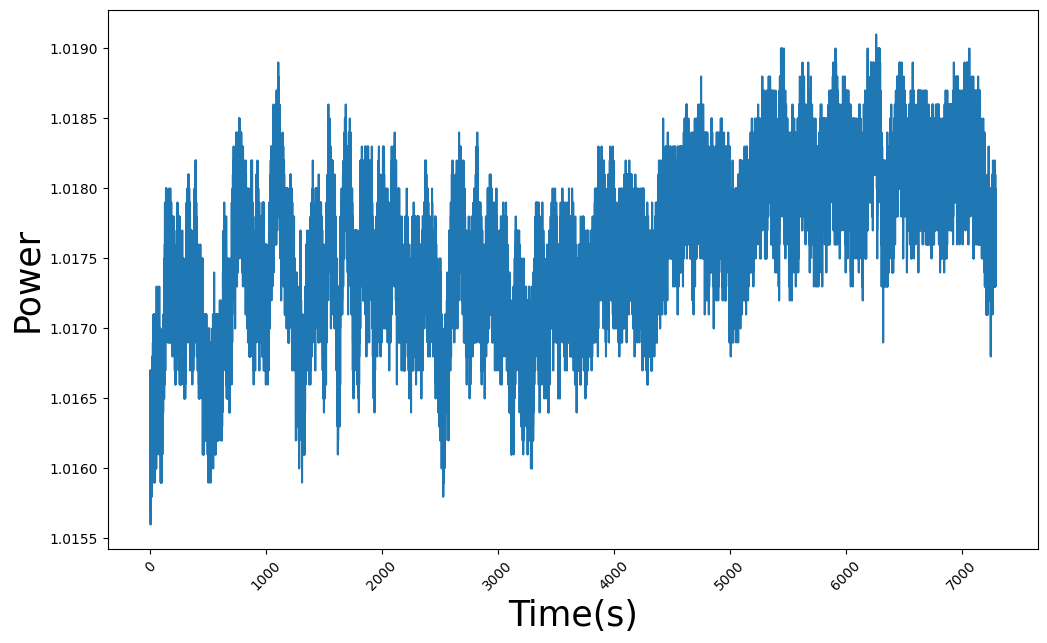

In [28]:
figure,ax=plt.subplots(1)
plt.xticks(rotation=45)
ax.plot(df_new, C3)
ax.set_xlabel(r'Time(s)',fontsize=25)
ax.set_ylabel(r'Power',fontsize=25)
#ax.set_ylim([1.5,1.75])
#plt.text(0.9,0.9,'rms: '+str(round(r,2))+' \nmean: '+str(round(m,2)),horizontalalignment='left',
#    verticalalignment='top', transform = ax.transAxes)
#print("rms is :",r, "W")

Text(0, 0.5, 'Power[W]')

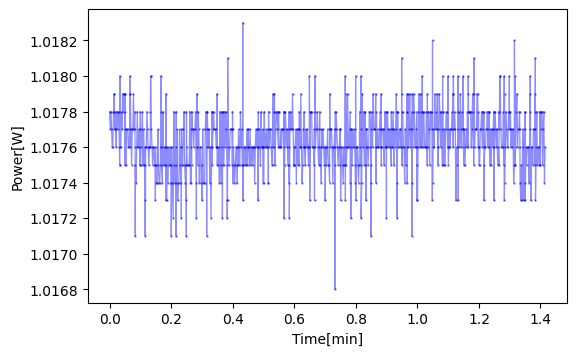

In [30]:
ts6=pd.to_datetime(C2_selected)

list=[]
for i in range(ts6.size):
    timestamp2 = datetime.timestamp(ts6[i]);
    list.append(timestamp2);
df_final = pd.Series(list)

df_new=df_final-df_final[0];


#figure,ax=plt.subplots(1)
#plt.rcParams['figure.figsize'] =  [12,7]
#plt.xticks(rotation=45,fontweight='bold')
#plt.yticks(fontweight='bold')
#ax.plot((df_new)/60,C2_selected)#'b+', label='Data points')
#ax.tick_params(labelsize=12)
#ax.set_xlabel('Time[min]',fontsize=25,fontweight='bold')
#ax.set_ylabel(r'Power[W]',fontsize=25,fontweight='bold')
#ax.set_xlim(0.0, 450.0)
#ax.set_ylim([1.5,1.7]);

#ax.set_xticks(np.arange(0, len(df_new)+1, len(df_new)/10));
#ax.set_title('selected between '+start_date +'and '+ end_date);

figure,ax=plt.subplots(1)
plt.rcParams['figure.figsize'] =  6.18, 3.81
#plt.rcParams['figure.figsize'] =  [12,7]
#plt.xticks(rotation=45,fontweight='bold')
ax.plot((df_new)/60,C3_selected,'.-', color='b', linewidth=0.9, markersize=1.5, alpha=0.45)
#ax.set_xlim(0.0, 450.0)
#ax.set_ylim([1.55,1.7]);
ax.set_xlabel('Time[min]')
ax.set_ylabel(r'Power[W]')

#ax.tight_layout()
#ax.set_title('A41912040')
#plt.grid(b=True, which='both')
#ax.text(0.9,0.9,'TA Power: '+ str(round(m,2))+' +/- '+ str(round(s,4))+' W ',horizontalalignment='right',
#     verticalalignment='top', transform = ax.transAxes)

#plt.grid()

#plt.text(0.9,0.9,'rms: '+str(round(r,2)) + ' W'+' \nmean: '+str(round(m,2))+' W'+' \nstd: '+str(round(s,4))+'\nTA Power: '+ str(round(m,2))+ ' W +/-'+ str(round(s,4)),horizontalalignment='right',
#     verticalalignment='top', transform = ax.transAxes,fontweight='bold',fontsize=10)
#plt.grid(True)
#plt.rc('grid', linestyle="-", color='black')
#plt.show()

